In [1]:
from classy import Class
import os
import copy
import yaml
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

from matplotlib import rc
from scipy.interpolate import interp1d

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
# matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]


In [2]:

def compute_axion(m_axion,f_axion,Omega_scf):
    cosmofid = {
    'Omega_cdm':0.3,
    'H0':67,
    'Omega_scf':Omega_scf,
    'm_axion':m_axion,
    'f_axion':f_axion,
    'scf_parameters': r'%g, %g' % (0.05, 0.),
    #'scf_parameters__2': 0., 
    'scf_potential': 'axion', 
    'n_axion': 1, 
    'scf_has_perturbations': 'yes', 
    'attractor_ic_scf': 'no',
    'do_shooting': 'yes',
    'do_shooting_scf': 'yes',
    'scf_tuning_index': 0,
    'tol_shooting_deltax':1e-4,
    'tol_shooting_deltaF':1e-4,
    'background_verbose':10,
    'thermodynamics_verbose':1,
    'scf_evolve_as_fluid':'yes',
    'scf_evolve_like_axionCAMB':'yes'
    }
    M = Class()
    M.set({'output': 'mPk', 'z_max_pk': 1, 'P_k_max_h/Mpc': 1.})
    M.set(cosmofid)
    M.compute()
    background = M.get_background() # load background table
    return background, M

In [3]:
#fiducial axion
background_axion_1,M1 = compute_axion(1e8,0.4,0.05)
background_z_1 = background_axion_1['z'] # read redshift

##here we vary the mass
background_axion_2,M2 = compute_axion(1e10,0.4,0.05)
background_axion_3,M3 = compute_axion(1e5,0.4,0.05)

##here we vary the density
background_axion_4,M4 = compute_axion(1e8,0.4,0.15)
background_axion_5,M5 = compute_axion(1e8,0.4,0.3)

##here we vary f_a
background_axion_6,M6 = compute_axion(1e8,0.1,0.05)
background_axion_7,M7 = compute_axion(1e8,0.6,0.05)


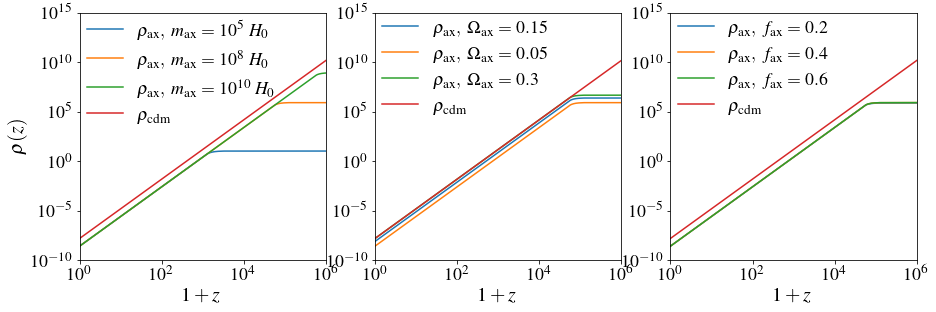

In [4]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_xscale('log')
ax2.set_yscale('log')

ax3.set_xscale('log')
ax3.set_yscale('log')

ax1.tick_params('x',labelsize=18)
ax1.tick_params('y',labelsize=18)
ax1.set_xlim((1,1000000))
ax1.set_ylim((1e-10,1e15))

ax2.tick_params('x',labelsize=18)
ax2.tick_params('y',labelsize=18)
ax2.set_xlim((1,1000000))
ax2.set_ylim((1e-10,1e15))


ax3.tick_params('x',labelsize=18)
ax3.tick_params('y',labelsize=18)
ax3.set_xlim((1,1000000))
ax3.set_ylim((1e-10,1e15))



ax1.set_xlabel(r"$1+z$", fontsize=20)
ax1.set_ylabel(r"$\rho(z)$", fontsize=20)
ax2.set_xlabel(r"$1+z$", fontsize=20)
# ax2.set_ylabel(r"$\rho(z)$", fontsize=20)
ax3.set_xlabel(r"$1+z$", fontsize=20)
# ax3.set_ylabel(r"$\rho(z)$", fontsize=20)


ax1.plot(1+background_z_1,background_axion_3['(.)rho_scf'],label=r'$\rho_{\rm ax},~m_{\rm ax}=10^5~H_0$')
ax1.plot(1+background_z_1,background_axion_1['(.)rho_scf'],label=r'$\rho_{\rm ax},~m_{\rm ax}=10^8~H_0$')
ax1.plot(1+background_z_1,background_axion_2['(.)rho_scf'],label=r'$\rho_{\rm ax},~m_{\rm ax}=10^{10}~H_0$')
ax1.plot(1+background_z_1,background_axion_1['(.)rho_cdm'],label=r'$\rho_{\rm cdm}$')




ax2.plot(1+background_z_1,background_axion_4['(.)rho_scf'],label=r'$\rho_{\rm ax},~\Omega_{\rm ax}=0.15$')
ax2.plot(1+background_z_1,background_axion_1['(.)rho_scf'],label=r'$\rho_{\rm ax},~\Omega_{\rm ax}=0.05$')
ax2.plot(1+background_z_1,background_axion_5['(.)rho_scf'],label=r'$\rho_{\rm ax},~\Omega_{\rm ax}=0.3$')
ax2.plot(1+background_z_1,background_axion_1['(.)rho_cdm'],label=r'$\rho_{\rm cdm}$')



ax3.plot(1+background_z_1,background_axion_6['(.)rho_scf'],label=r'$\rho_{\rm ax},~f_{\rm ax}=0.2$')
ax3.plot(1+background_z_1,background_axion_1['(.)rho_scf'],label=r'$\rho_{\rm ax},~f_{\rm ax}=0.4$')
ax3.plot(1+background_z_1,background_axion_7['(.)rho_scf'],label=r'$\rho_{\rm ax},~f_{\rm ax}=0.6$')
ax3.plot(1+background_z_1,background_axion_1['(.)rho_cdm'],label=r'$\rho_{\rm cdm}$')

ax1.legend(frameon=False,prop={'size':18},loc='upper left',borderaxespad=0.)
ax2.legend(frameon=False,prop={'size':18},loc='upper left',borderaxespad=0.)
ax3.legend(frameon=False,prop={'size':18},loc='upper left',borderaxespad=0.)

plt.savefig('axion_example_rho.pdf', bbox_inches='tight')

In [5]:
cosmoLCDM = {
'Omega_cdm':0.3,
'H0':67,
}
LCDM = Class()
LCDM.set({'output': 'mPk', 'z_max_pk': 1, 'P_k_max_h/Mpc': 1.})
LCDM.set(cosmoLCDM)
LCDM.compute()

kk = np.logspace(-4, np.log10(M1.h()), 10000)
Pk_LCDM = [LCDM.pk(ki, 0) for ki in kk]

Pk_axion1 = [M1.pk(ki, 0) for ki in kk]
Pk_axion2 = [M2.pk(ki, 0) for ki in kk]
Pk_axion3 = [M3.pk(ki, 0) for ki in kk]
Pk_axion4 = [M4.pk(ki, 0) for ki in kk]
Pk_axion5 = [M5.pk(ki, 0) for ki in kk]
Pk_axion6 = [M6.pk(ki, 0) for ki in kk]
Pk_axion7 = [M7.pk(ki, 0) for ki in kk]


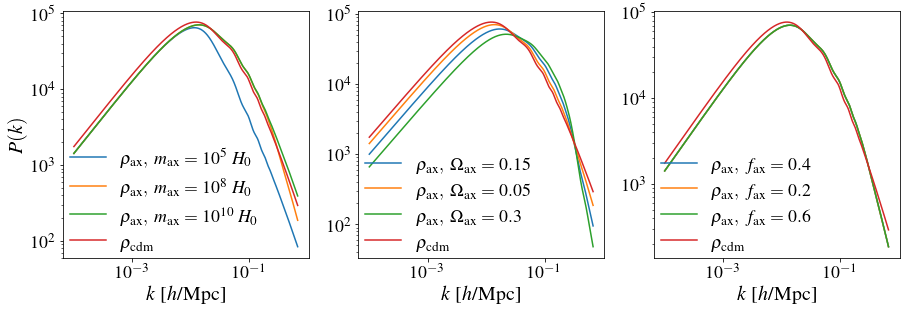

In [6]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_xscale('log')
ax2.set_yscale('log')

ax3.set_xscale('log')
ax3.set_yscale('log')

ax1.tick_params('x',labelsize=18)
ax1.tick_params('y',labelsize=18)
# ax1.set_xlim((1,1000000))
# ax1.set_ylim((1e-10,1e15))

ax2.tick_params('x',labelsize=18)
ax2.tick_params('y',labelsize=18)
# ax2.set_xlim((1,1000000))
# ax2.set_ylim((1e-10,1e15))


ax3.tick_params('x',labelsize=18)
ax3.tick_params('y',labelsize=18)
# ax3.set_xlim((1,1000000))
# ax3.set_ylim((1e-10,1e15))



ax1.set_xlabel(r"$k$ [$h$/Mpc]", fontsize=20)
ax1.set_ylabel(r"$P(k)$", fontsize=20)
ax2.set_xlabel(r"$k$ [$h$/Mpc]", fontsize=20)
# ax2.set_ylabel(r"$\rho(z)$", fontsize=20)
ax3.set_xlabel(r"$k$ [$h$/Mpc]", fontsize=20)
# ax3.set_ylabel(r"$\rho(z)$", fontsize=20)


ax1.plot(kk,Pk_axion3,label=r'$\rho_{\rm ax},~m_{\rm ax}=10^5~H_0$')
ax1.plot(kk,Pk_axion1,label=r'$\rho_{\rm ax},~m_{\rm ax}=10^8~H_0$')
ax1.plot(kk,Pk_axion2,label=r'$\rho_{\rm ax},~m_{\rm ax}=10^{10}~H_0$')
ax1.plot(kk,Pk_LCDM,label=r'$\rho_{\rm cdm}$')


ax2.plot(kk,Pk_axion4,label=r'$\rho_{\rm ax},~\Omega_{\rm ax}=0.15$')
ax2.plot(kk,Pk_axion1,label=r'$\rho_{\rm ax},~\Omega_{\rm ax}=0.05$')
ax2.plot(kk,Pk_axion5,label=r'$\rho_{\rm ax},~\Omega_{\rm ax}=0.3$')
ax2.plot(kk,Pk_LCDM,label=r'$\rho_{\rm cdm}$')



ax3.plot(kk,Pk_axion6,label=r'$\rho_{\rm ax},~f_{\rm ax}=0.4$')
ax3.plot(kk,Pk_axion1,label=r'$\rho_{\rm ax},~f_{\rm ax}=0.2$')
ax3.plot(kk,Pk_axion7,label=r'$\rho_{\rm ax},~f_{\rm ax}=0.6$')
ax3.plot(kk,Pk_LCDM,label=r'$\rho_{\rm cdm}$')


ax1.legend(frameon=False,prop={'size':18},loc='lower left',borderaxespad=0.)
ax2.legend(frameon=False,prop={'size':18},loc='lower left',borderaxespad=0.)
ax3.legend(frameon=False,prop={'size':18},loc='lower left',borderaxespad=0.)

plt.savefig('axion_example_pk.pdf', bbox_inches='tight')